In [60]:
# Importamos librerias requeridas para el EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ast

In [61]:
df = pd.read_csv('steam_games.csv')

In [62]:
df = df.dropna(subset=['release_date'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df = df.dropna(subset=['genres'])
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df = df.drop(columns=['release_date'])
df = df.dropna(subset=['developer'])
df = df.dropna(subset=['specs'])

In [63]:
df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'tags',
       'discount_price', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer', 'sentiment', 'metascore', 'release_year'],
      dtype='object')

In [64]:
print(df.shape)
df.head()

(25633, 16)


,publisher,genres,app_name,title,url,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN,2018
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN,2017
5,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,"['Action', 'Adventure', 'Simulation', 'FPS', '...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd,Mixed,NaN,2018
6,NaN,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,"['Free to Play', 'Indie', 'Simulation', 'Sports']",NaN,http://steamcommunity.com/app/774276/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",9.99,False,774276.0,Poppermost Productions,NaN,NaN,2018
7,Poppermost Productions,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,"['Free to Play', 'Indie', 'Simulation', 'Sports']",NaN,http://steamcommunity.com/app/774277/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",18.99,False,774277.0,Poppermost Productions,NaN,NaN,2018


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25633 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       21197 non-null  object 
 1   genres          25633 non-null  object 
 2   app_name        25633 non-null  object 
 3   title           25633 non-null  object 
 4   url             25633 non-null  object 
 5   tags            25622 non-null  object 
 6   discount_price  138 non-null    float64
 7   reviews_url     25632 non-null  object 
 8   specs           25633 non-null  object 
 9   price           25633 non-null  float64
 10  early_access    25633 non-null  bool   
 11  id              25632 non-null  float64
 12  developer       25633 non-null  object 
 13  sentiment       20099 non-null  object 
 14  metascore       2416 non-null   float64
 15  release_year    25633 non-null  int64  
dtypes: bool(1), float64(4), int64(1), object(10)
memory usage: 3.2+ MB


In [66]:
df.describe()

,discount_price,price,id,metascore,release_year
count,138.000000,25633.000000,2.563200e+04,2416.000000,25633.000000
mean,3.827754,9.188987,4.380088e+05,72.235927,2014.819998
std,4.972347,14.922710,1.866192e+05,10.784767,3.320548
min,0.490000,0.490000,1.000000e+01,20.000000,1983.000000
25%,0.690000,2.990000,3.132952e+05,66.000000,2014.000000
50%,1.790000,4.990000,4.343250e+05,74.000000,2016.000000
75%,4.490000,9.990000,5.852125e+05,80.000000,2017.000000
max,31.490000,995.000000,2.028850e+06,96.000000,2021.000000


In [67]:
tipo_texto = df.select_dtypes(include=["object"]).columns
data_texto = df[tipo_texto]
data_texto.describe()

,publisher,genres,app_name,title,url,tags,reviews_url,specs,developer,sentiment
count,21197,25633,25633,25633,25633,25622,25632,25633,25633,20099
unique,7286,690,25614,25614,25633,12025,25631,3186,9948,18
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,"['Casual', 'Simulation']",http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],Ubisoft - San Francisco,Mixed
freq,362,1745,3,3,1,1286,2,2515,1258,3275


In [68]:
df.isnull().sum()

publisher          4436
genres                0
app_name              0
title                 0
url                   0
tags                 11
discount_price    25495
reviews_url           1
specs                 0
price                 0
early_access          0
id                    1
developer             0
sentiment          5534
metascore         23217
release_year          0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_10992\4044553132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


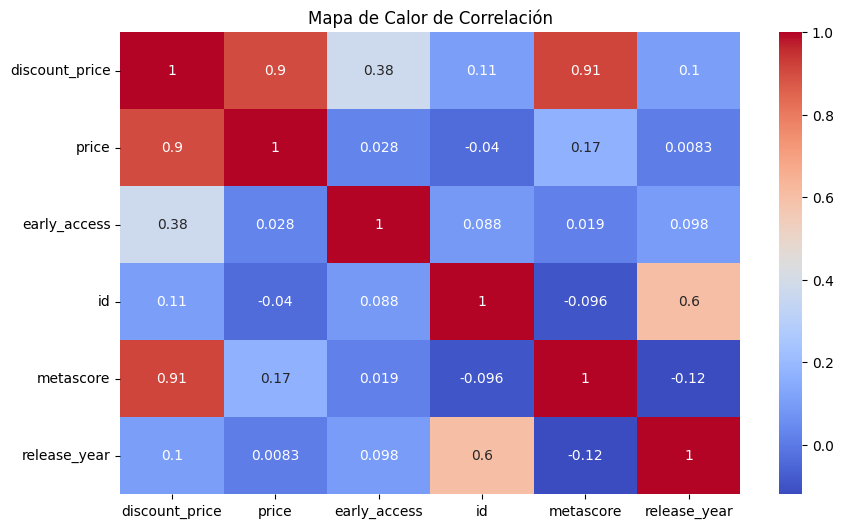

In [69]:
#Gráfico de Correlación:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

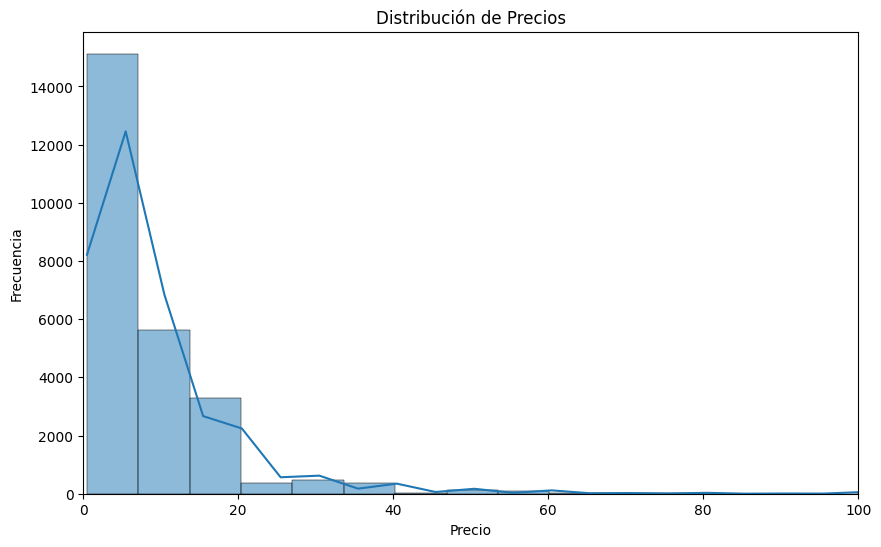

In [70]:
# Visualizar la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=150, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')

# Ajustar límites del eje x para mostrar el rango deseado
plt.xlim(0, 100)  # Ajusta los valores de límite según tu preferencia

plt.show()


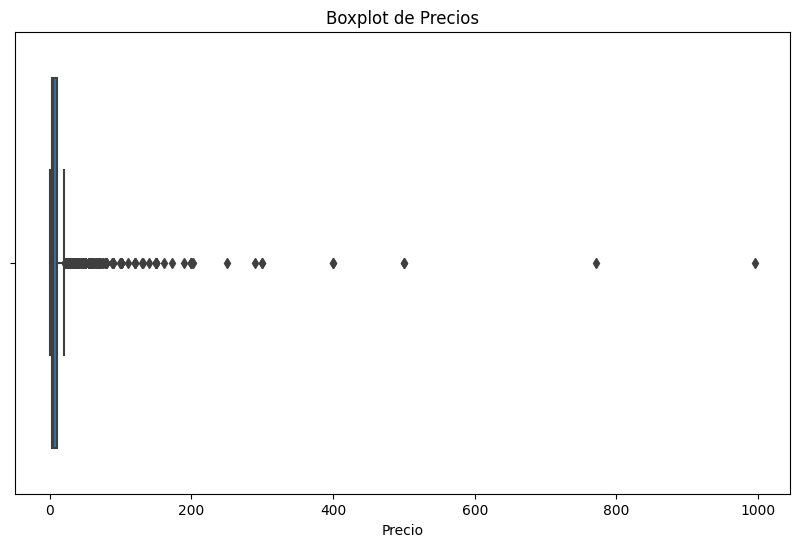

In [71]:
# Identificar outliers en el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.xlabel('Precio')
plt.title('Boxplot de Precios')
plt.show()

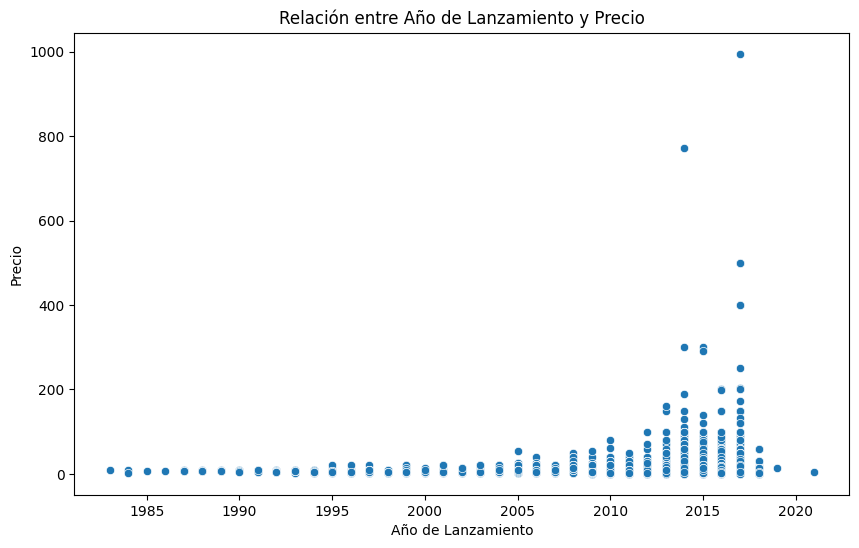

In [72]:
# Relación entre 'release_year' y 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='price', data=df)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio')
plt.title('Relación entre Año de Lanzamiento y Precio')
plt.show()

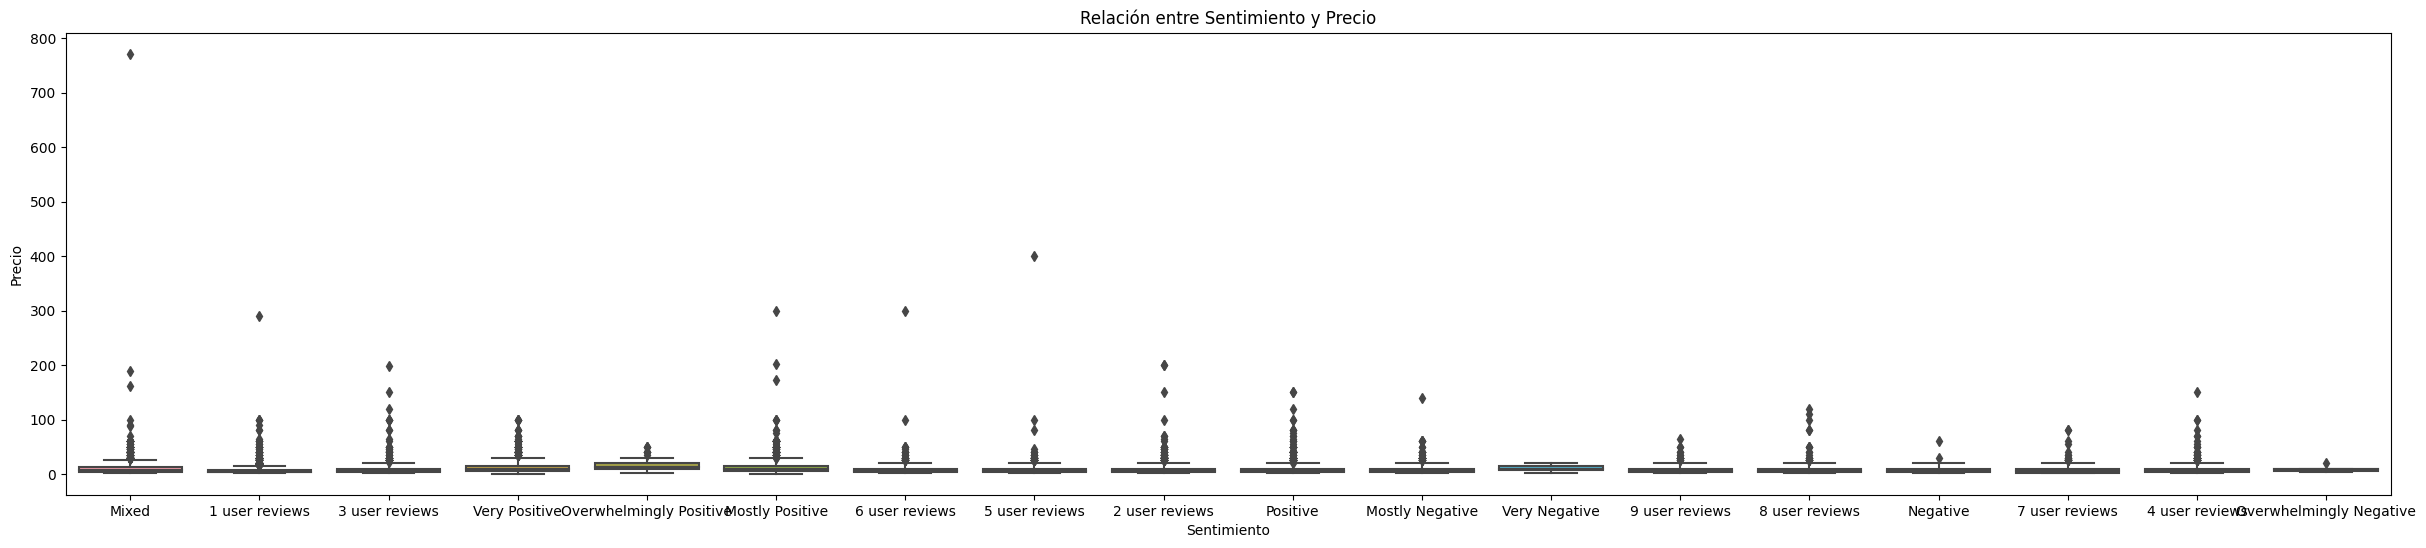

In [73]:
# Relación entre 'sentiment' y 'price'
plt.figure(figsize=(30, 6))
sns.boxplot(x='sentiment', y='price', data=df)
plt.xlabel('Sentimiento')
plt.ylabel('Precio')
plt.title('Relación entre Sentimiento y Precio')
plt.show()

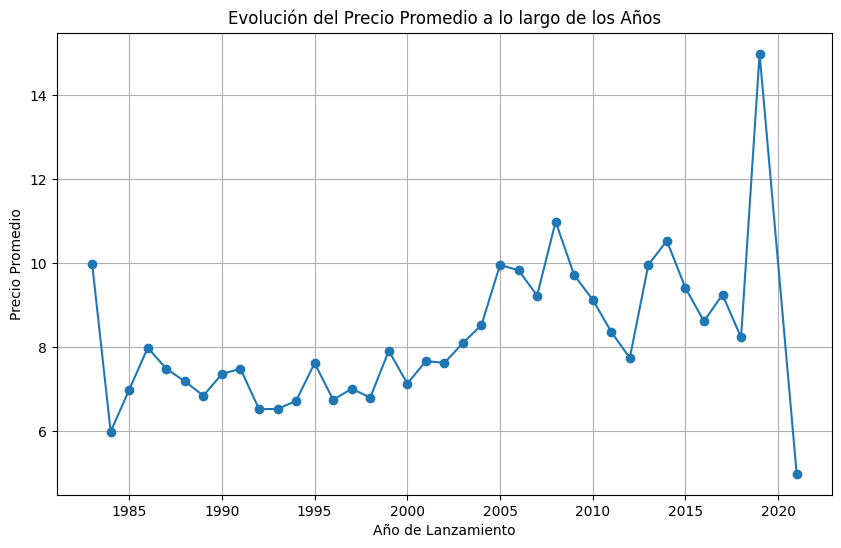

In [74]:
#Gráfico de Líneas Temporales
plt.figure(figsize=(10, 6))
df.groupby('release_year')['price'].mean().plot(marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio Promedio')
plt.title('Evolución del Precio Promedio a lo largo de los Años')
plt.grid(True)
plt.show()

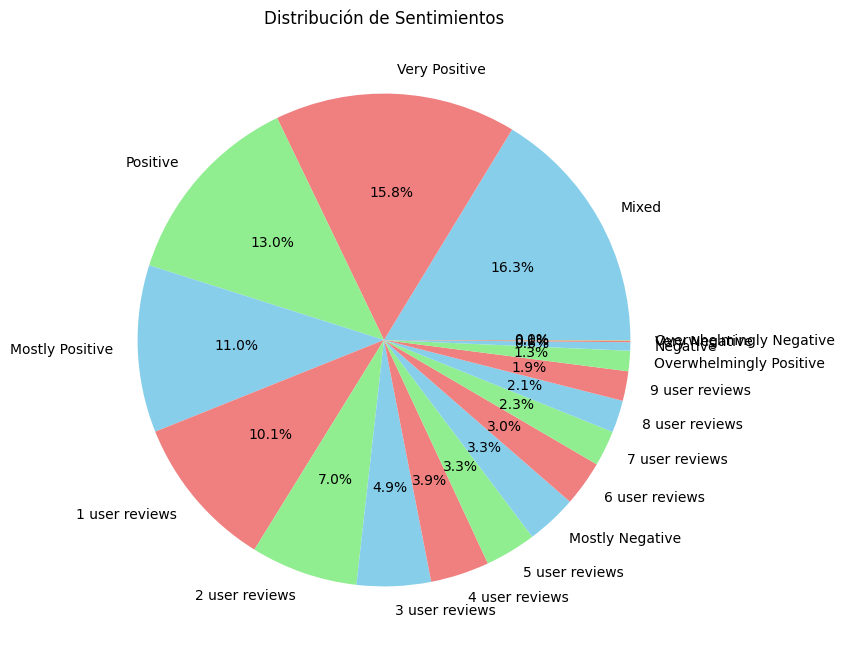

In [75]:
#Gráfico de Pastel
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Sentimientos')
plt.ylabel('')
plt.show()


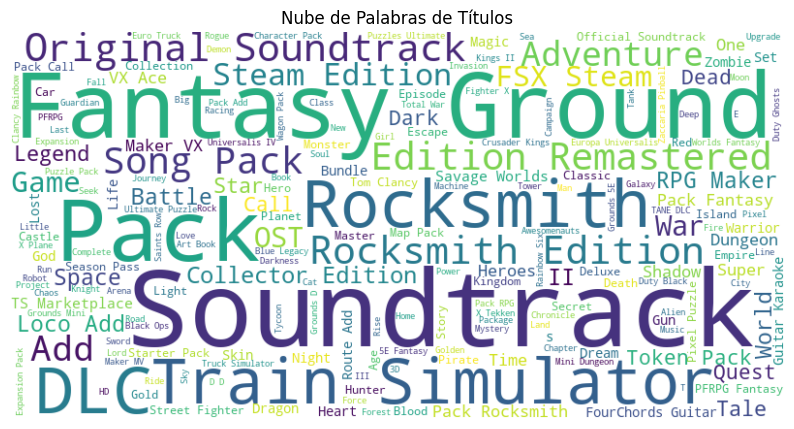

In [76]:
# Nube de palabras de los títulos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['app_name']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

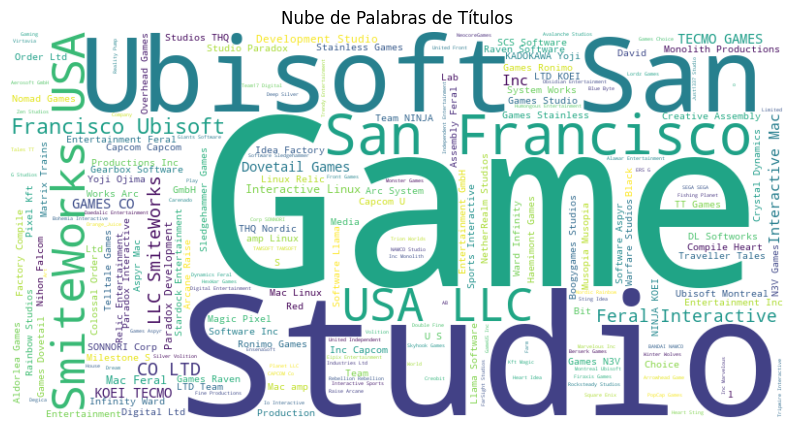

In [77]:
# Nube de palabras de los desarrolladores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['developer']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

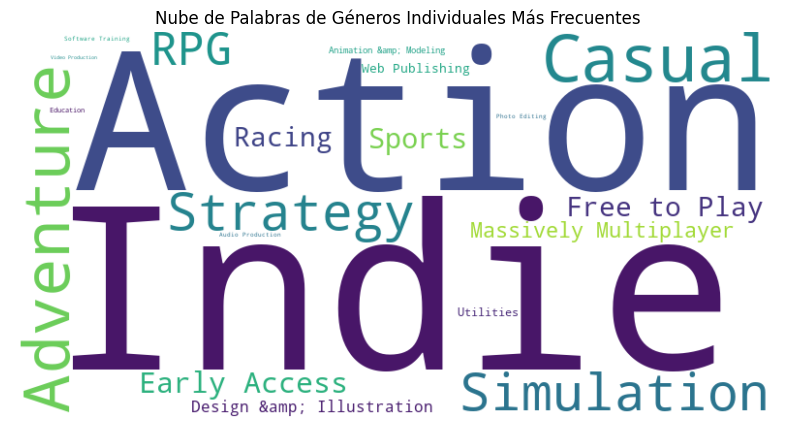

In [78]:
# Convertir las cadenas en listas de géneros
df['genres_list'] = df['genres'].apply(ast.literal_eval)

# Crear una lista plana de géneros individuales
all_genres = [genre for genres_list in df['genres_list'] for genre in genres_list]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Géneros Individuales Más Frecuentes')
plt.show()

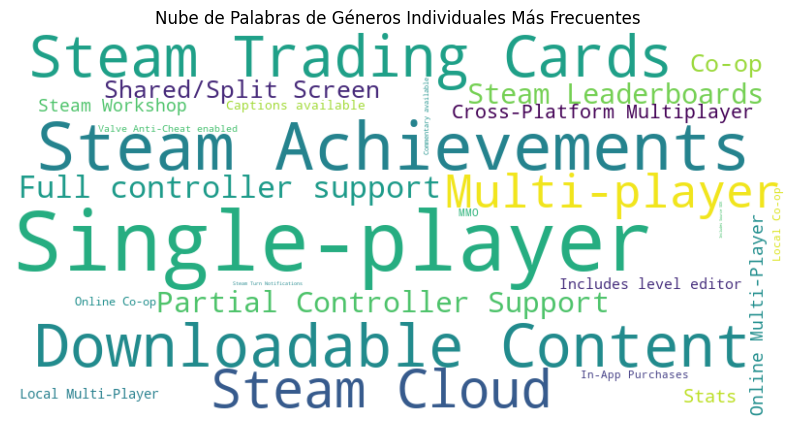

In [79]:
# Convertir las cadenas en listas de géneros
df['specs_list'] = df['specs'].apply(ast.literal_eval)

# Crear una lista plana de géneros individuales
all_genres = [genre for genres_list in df['specs_list'] for genre in genres_list]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Géneros Individuales Más Frecuentes')
plt.show()